# Assignment: Decision Trees and Random Forests
The objectives of this assignment are:
- to learn to use decision trees to build a transparent, human-readable predictive model.
- to learn to use random forests for improved predictive performance.

## Business Understanding
In this example we will demonstrate how to determine if website is malicious or not based on several different features in the dataset. 

In [143]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier



# fetch dataset 
phishing_websites = fetch_ucirepo(id=327) 
data = phishing_websites.data.original



##  Data Understanding
The dataset consists of multiple different values which correspond to the websites features.
To determine if a website is malicious or not, we can take a look at features such as:

- Url length
- Usage of shortening services
- Double slash redirecting
- Having sub domain
- Validating SSL certificates

These are only a few included in the datasets. Most importantly the target value is "Result" which indicates if the website is malicious or not. (-1) malicious (1) safe.



In [144]:
data.head()

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


## Data Preparation
Now that we know what the data looks like, we can prepare it for modeling. 
Below we seperate feature and target.

In [145]:

#FEATURE
X = data.drop(['result'], axis = 1)

#TARGET
y = data['result'].astype('category')

## Modeling
Now that the data has been prepared, we will choose the model, train it and visualize the tree. Specific methodologies used will be gone through later.

First we will split the data:
- 75% for training
- 25% for testing


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8291, 30) (2764, 30) (8291,) (2764,)


Now that the data has been splitted, next step is to choose an algorithms for our models.
Algorithms used:
- Decision tree
- Random forest tree


In [147]:
DecisionTreeModel = DecisionTreeClassifier(max_depth=2, random_state=20)
RandomForestModel = RandomForestClassifier(n_estimators=300, bootstrap=True, max_samples=0.6, max_features=0.7, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=123)

Now we will train our models

In [148]:
DecisionTreeModel.fit(X_train, y_train)
RandomForestModel.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",0.7
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_tr

Let's visualize the decision tree model

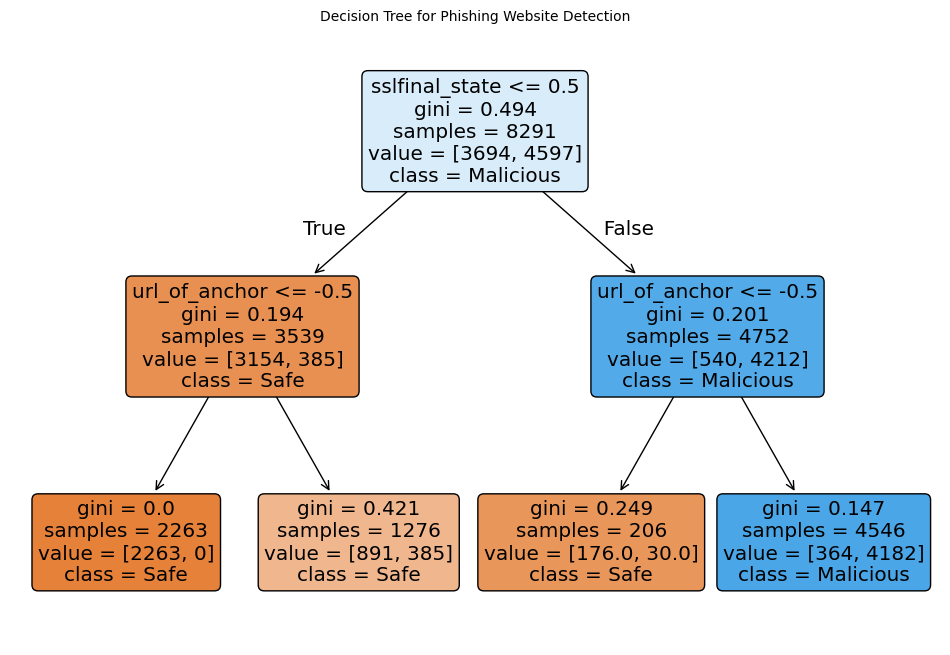

In [149]:
fig = plt.figure(figsize = (12, 8))
plot_tree(DecisionTreeModel, feature_names = X.keys(), class_names = ['Safe', 'Malicious'], filled = True, rounded = True)

plt.title("Decision Tree for Phishing Website Detection", fontsize = 10)
plt.show()

Let's visualize the random forest tree model

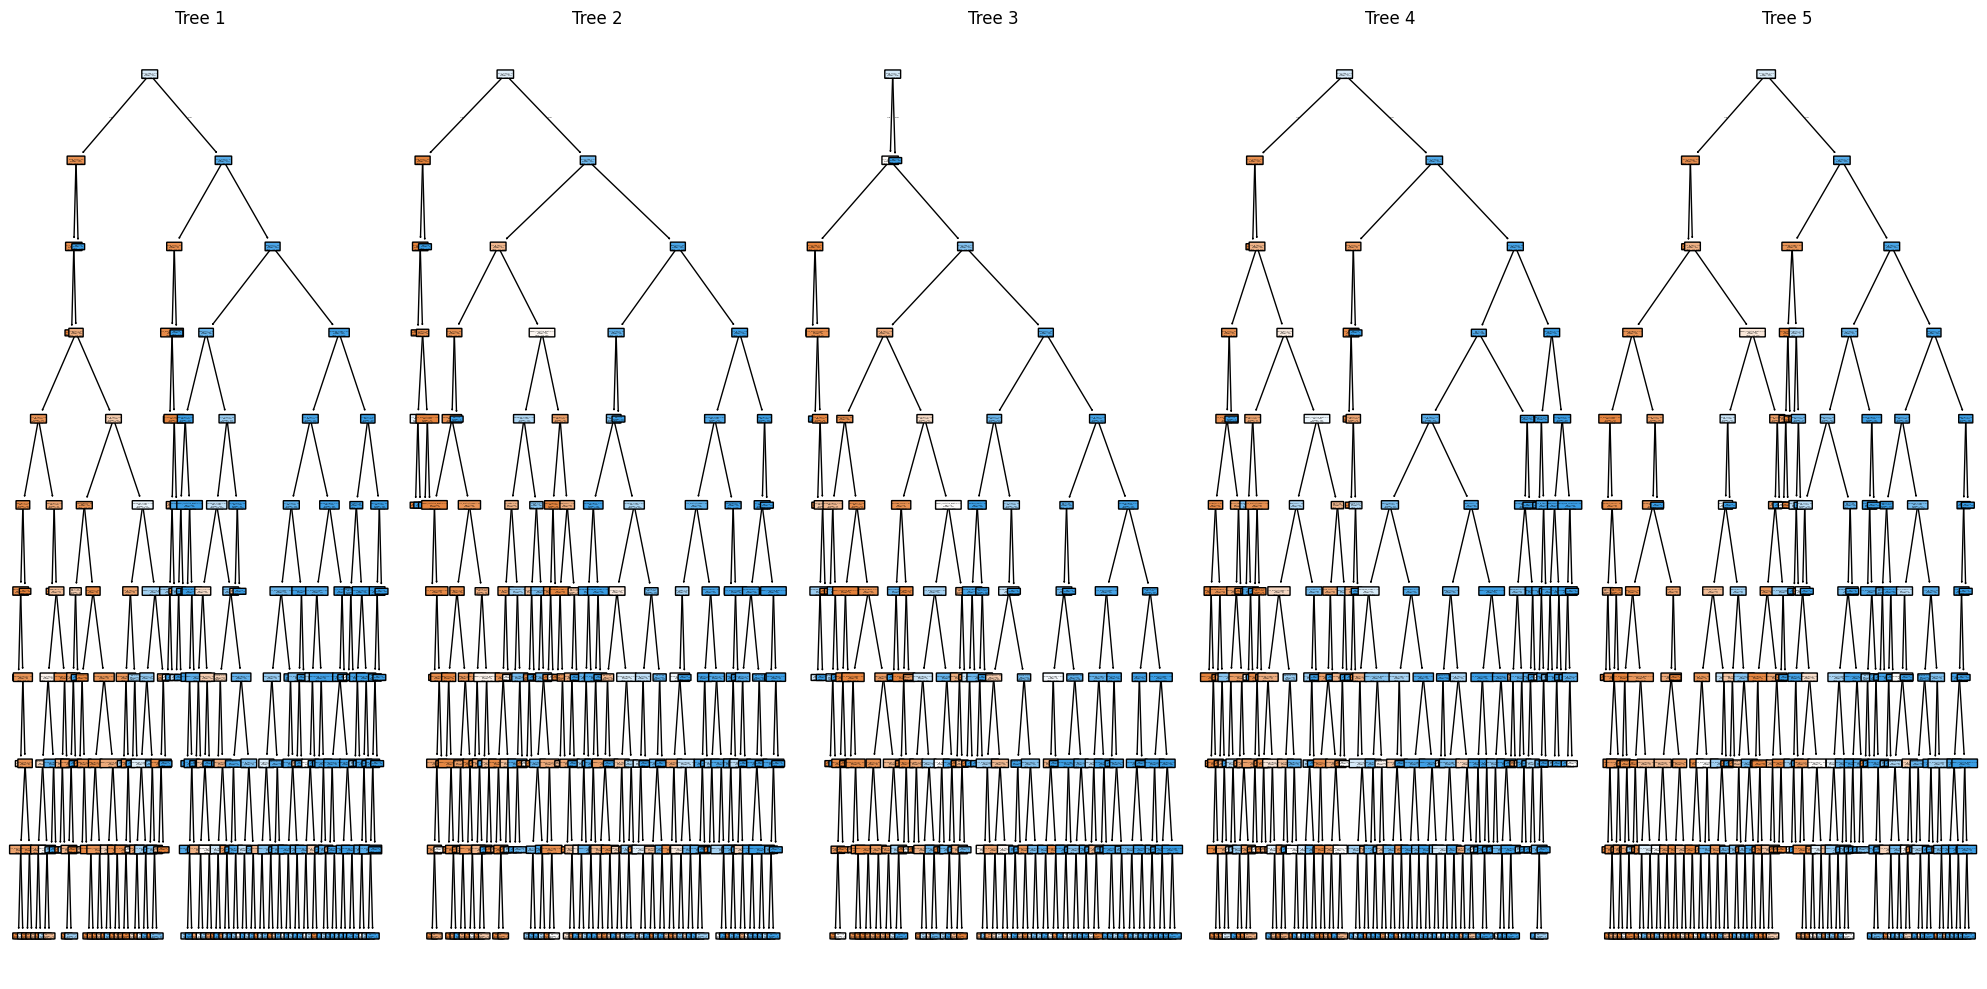

In [150]:

# Number of trees to plot
n_trees_to_plot = 5
# Create a figure to hold the plots
plt.figure(figsize=(20, 10))

for i in range(n_trees_to_plot):
    plt.subplot(1, n_trees_to_plot, i + 1)  # 1 row and n_trees_to_plot columns
    plot_tree(RandomForestModel.estimators_[i], filled=True,
              feature_names=X.columns, class_names=['Safe', 'Malicious'], rounded=True)
    plt.title(f'Tree {i + 1}')

plt.tight_layout()
plt.show()

## Evaluation
Now it is time to evaluate our models. Let's start by creating a confusion matrix for decision tree model.

In [151]:

# Get predictions
dt_preds = DecisionTreeModel.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, dt_preds, labels=[1, -1])  # 1=Safe, -1=Malicious

# Convert to DataFrame with labels
dt_confusion_matrix_df = pd.DataFrame(
    cm,
    index=['Actual Safe', 'Actual Malicious'],
    columns=['Predicted Safe', 'Predicted Malicious']
)

print(dt_confusion_matrix_df)

                  Predicted Safe  Predicted Malicious
Actual Safe                 1412                  148
Actual Malicious             109                 1095


Next we will do the same but for Random Forest model.

In [152]:
# Get predictions
rf_preds = RandomForestModel.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, rf_preds, labels=[1, -1])  # 1=Safe, -1=Malicious

# Convert to DataFrame with labels
rf_confusion_matrix_df = pd.DataFrame(
    cm,
    index=['Actual Safe', 'Actual Malicious'],
    columns=['Predicted Safe', 'Predicted Malicious']
)

print(rf_confusion_matrix_df)

                  Predicted Safe  Predicted Malicious
Actual Safe                 1504                   56
Actual Malicious              55                 1149


Let's measure the accuracy of each model

In [153]:

dt_accuracy = (dt_confusion_matrix_df.iloc[0,0] + dt_confusion_matrix_df.iloc[1,1]) / dt_confusion_matrix_df.values.sum()
rf_accuracy = (rf_confusion_matrix_df.iloc[0,0] + rf_confusion_matrix_df.iloc[1,1]) / rf_confusion_matrix_df.values.sum()

print(f"Accuracy of decision tree model: {dt_accuracy:.2f}")
print(f"Accuracy of random tree forest model: {rf_accuracy:.2f}")

Accuracy of decision tree model: 0.91
Accuracy of random tree forest model: 0.96


## Deployment